Tps d'execution e fonction de la valeur de C : plus C est grande plus ca prends du temps (et normalement plus C grande plus P(X=Y) est grande)

Pour C=0.1

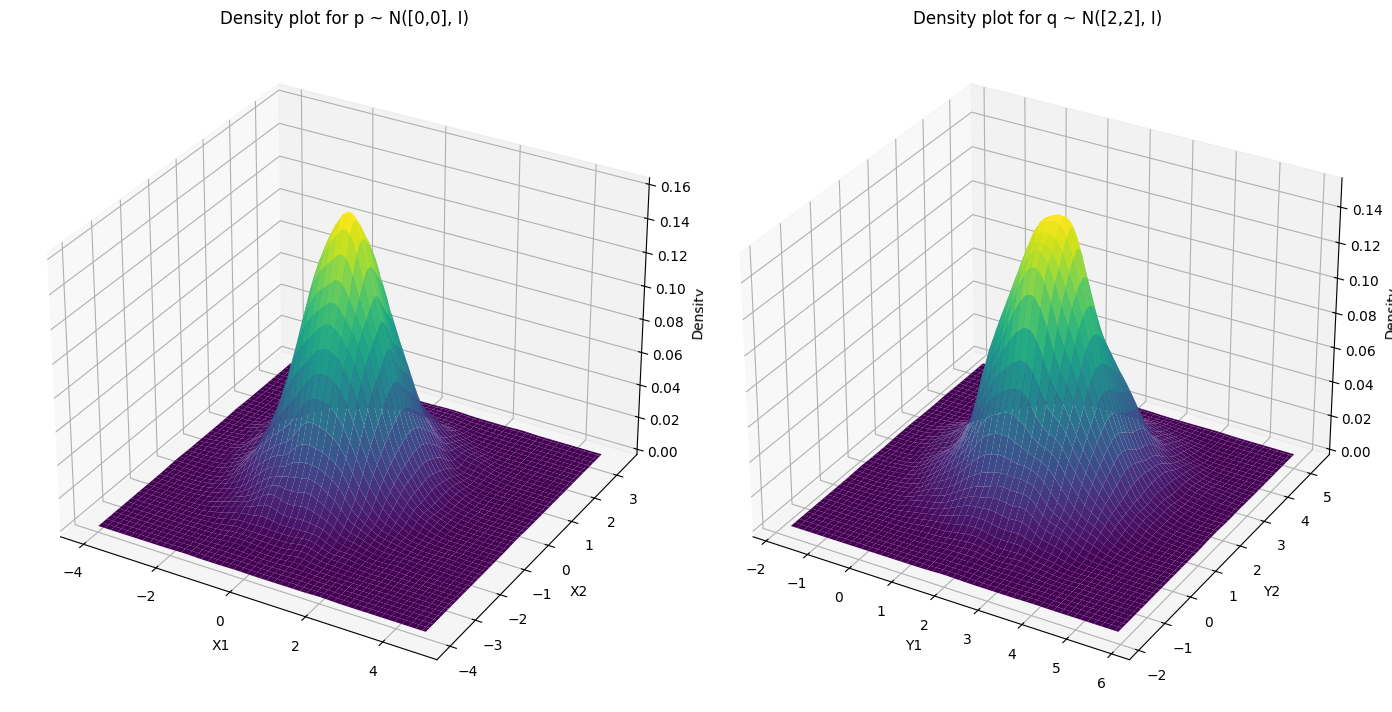

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random


mean_p = np.array([0, 0])     # Mean for the first distribution p
cov_p = np.identity(2)        # Covariance matrix for p (identity for standard normals)

mean_q = np.array([2, 2])     # Mean for the second distribution q, means that distribution q is centered at the point (2, 2) in the same space.
cov_q = np.identity(2)        # Covariance matrix for q (identity for simplicity)


def sample_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)


def multivariate_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)


def ThorissonCoupling(p_sample, q_sample, p_pdf, q_pdf, C, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)

    if U < min((q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)), C):
        Y = X
    else:
        A = 0
        while A != 1:
            U = random.uniform(0, 1)
            Z = q_sample(mean_q, cov_q)
            if U > min(1, (C * p_pdf(Z, mean_p, cov_p) / q_pdf(Z, mean_q, cov_q))):
                A = 1
                Y = Z
    return X, Y


C = 0.1
samples_X = []
samples_Y = []

for _ in range(10000):
    X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal, multivariate_normal_pdf, multivariate_normal_pdf,C, mean_p, cov_p, mean_q, cov_q)
    samples_X.append(X)
    samples_Y.append(Y)


samples_X = np.array(samples_X)
samples_Y = np.array(samples_Y)


import numpy as np

from scipy.stats import gaussian_kde
'''
Kernel Density Estimation (KDE)
After generating many samples from p and q, the code uses Gaussian KDE to estimate the probability density function from these samples.
KDE is a way to create a smooth representation of your data's distribution, 
but it does not provide direct probabilities for events concerning two different random variables like X and Y being equal
'''

def compute_kde(samples):
    kde = gaussian_kde(samples.T, bw_method='silverman')
    x_min, y_min = samples.min(axis=0)
    x_max, y_max = samples.max(axis=0)
    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

    positions = np.vstack([X.ravel(), Y.ravel()])

    density = np.reshape(kde(positions).T, X.shape)

    return X, Y, density


X_p, Y_p, density_p = compute_kde(samples_X)
X_q, Y_q, density_q = compute_kde(samples_Y)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(X_p, Y_p, density_p, cmap='viridis')

ax.set_title('Density plot for p ~ N([0,0], I)')

ax.set_xlabel('X1')

ax.set_ylabel('X2')

ax.set_zlabel('Density')





ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(X_q, Y_q, density_q, cmap='viridis')

ax.set_title('Density plot for q ~ N([2,2], I)')

ax.set_xlabel('Y1')

ax.set_ylabel('Y2')

ax.set_zlabel('Density')



plt.tight_layout()

plt.show()

#On ne dessine pas les theoriques 
#C=1  -> 14s , C=0.1 -> 10.5w

Pour C=0.99

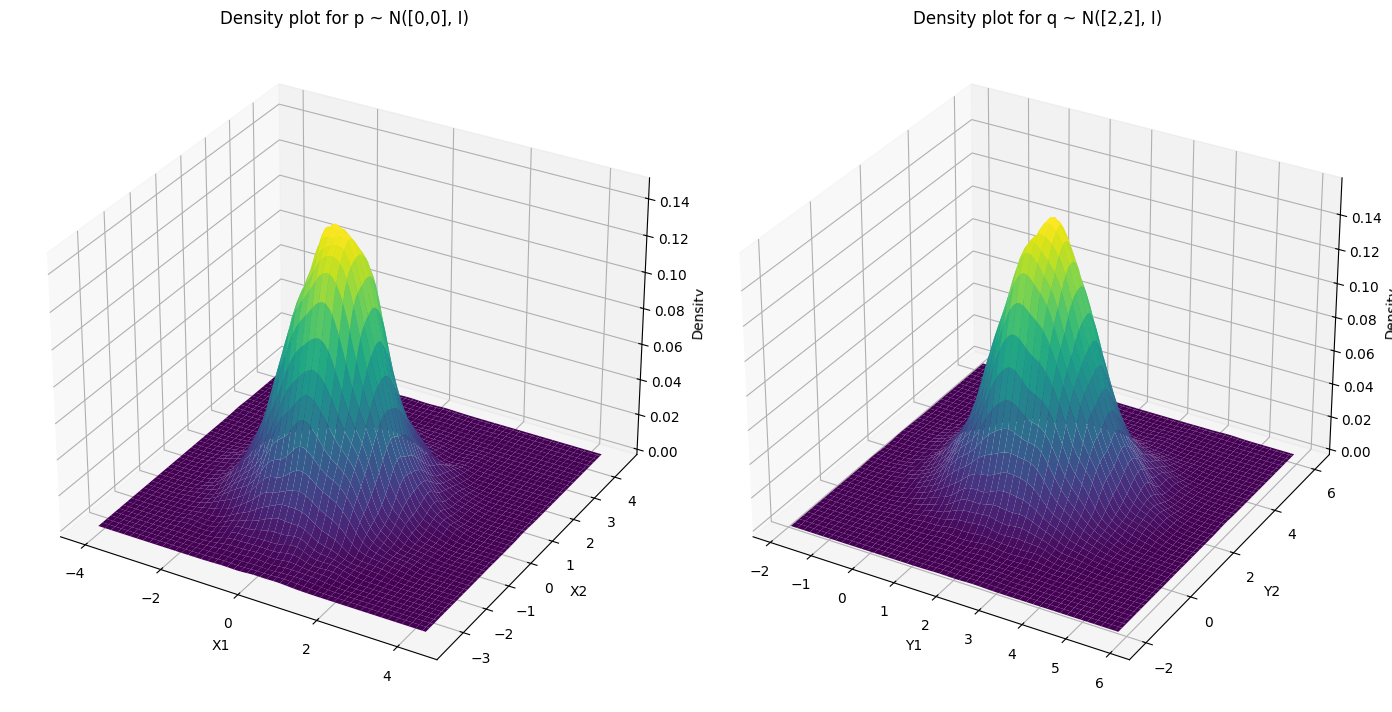

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random


mean_p = np.array([0, 0])     # Mean for the first distribution p
cov_p = np.identity(2)        # Covariance matrix for p (identity for standard normals)

mean_q = np.array([2, 2])     # Mean for the second distribution q
cov_q = np.identity(2)        # Covariance matrix for q (identity for simplicity)


def sample_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)


def multivariate_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)


def ThorissonCoupling(p_sample, q_sample, p_pdf, q_pdf, C, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)

    if U < min((q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)), C):
        Y = X
    else:
        A = 0
        while A != 1:
            U = random.uniform(0, 1)
            Z = q_sample(mean_q, cov_q)
            if U > min(1, (C * p_pdf(Z, mean_p, cov_p) / q_pdf(Z, mean_q, cov_q))):
                A = 1
                Y = Z
    return X, Y


C = 0.99
samples_X = []
samples_Y = []

for _ in range(10000):
    X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal, multivariate_normal_pdf, multivariate_normal_pdf,C, mean_p, cov_p, mean_q, cov_q)
    samples_X.append(X)
    samples_Y.append(Y)


samples_X = np.array(samples_X)
samples_Y = np.array(samples_Y)


import numpy as np

from scipy.stats import gaussian_kde


def compute_kde(samples):
    kde = gaussian_kde(samples.T, bw_method='silverman')
    x_min, y_min = samples.min(axis=0)
    x_max, y_max = samples.max(axis=0)
    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

    positions = np.vstack([X.ravel(), Y.ravel()])

    density = np.reshape(kde(positions).T, X.shape)

    return X, Y, density


X_p, Y_p, density_p = compute_kde(samples_X)
X_q, Y_q, density_q = compute_kde(samples_Y)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(X_p, Y_p, density_p, cmap='viridis')

ax.set_title('Density plot for p ~ N([0,0], I)')

ax.set_xlabel('X1')

ax.set_ylabel('X2')

ax.set_zlabel('Density')





ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(X_q, Y_q, density_q, cmap='viridis')

ax.set_title('Density plot for q ~ N([2,2], I)')

ax.set_xlabel('Y1')

ax.set_ylabel('Y2')

ax.set_zlabel('Density')



plt.tight_layout()

plt.show()

#On ne dessine pas les theoriques 
#C=1  -> 14s , C=0.1 -> 10.5w

In [36]:
tolerance = 1e-5  # Tolerance for considering two values equal

# Count how many times X equals Y within the tolerance
equal_count = np.sum(np.abs(samples_X - samples_Y) <= tolerance, axis=1)
P_X_equals_Y = np.mean(equal_count)

print(f"For C=1 , Estimated P(X = Y) with tolerance = {tolerance}: {P_X_equals_Y}")

For C=1 , Estimated P(X = Y) with tolerance = 1e-05: 0.3008


Estimated P(X = Y) for Different Values of C

In [37]:
import numpy as np

tolerance = 1e-5
num_samples = 10000  
C_values = np.linspace(0.01, 0.99, 50) 
P_X_equals_Y_estimates = []

for C in C_values:
    equal_count = 0
    for _ in range(num_samples):
        X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                 multivariate_normal_pdf, multivariate_normal_pdf,
                                 C, mean_p, cov_p, mean_q, cov_q)
        
        if np.linalg.norm(X - Y) <= tolerance:
            equal_count += 1
    
    P_X_equals_Y_estimates.append(equal_count / num_samples)


import matplotlib.pyplot as plt

plt.plot(C_values, P_X_equals_Y_estimates, '-o')
plt.xlabel('C value')
plt.ylabel('Estimated P(X = Y)')
plt.title('Estimated P(X = Y) for Different Values of C')
plt.show()


KeyboardInterrupt: 

In [ ]:
#REV

tolerance = 0
num_samples = 100000  
C_values = np.linspace(0.01, 0.99, 50) 
P_X_equals_Y_estimates = []

for C in C_values:
    equal_count = 0
    for _ in range(num_samples):
        X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                 multivariate_normal_pdf, multivariate_normal_pdf,
                                 C, mean_p, cov_p, mean_q, cov_q)
        
        if np.linalg.norm(X - Y) <= tolerance:
            equal_count += 1
    
    P_X_equals_Y_estimates.append(equal_count / num_samples)


import matplotlib.pyplot as plt

plt.plot(C_values, P_X_equals_Y_estimates, '-o')
plt.xlabel('C value')
plt.ylabel('Estimated P(X = Y)')
plt.title('Estimated P(X = Y) for Different Values of C')
plt.show()


Running time with num_run=1

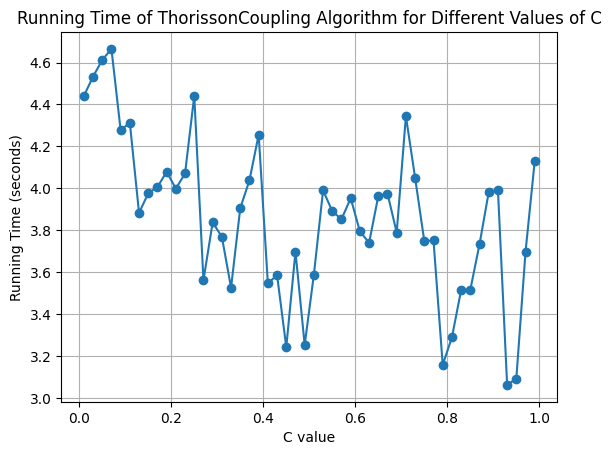

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


num_samples = 10000  
C_values = np.linspace(0.01, 0.99, 50)  # Values of C
running_times = []

for C in C_values:
    start_time = time.time()  # Start the timer
    
    for _ in range(num_samples):
        X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                 multivariate_normal_pdf, multivariate_normal_pdf,
                                 C, mean_p, cov_p, mean_q, cov_q)
    
    end_time = time.time()  # End the timer
    running_time = end_time - start_time  # Calculate the running time
    running_times.append(running_time)

# Plot the running times against the C values
plt.plot(C_values, running_times, '-o')
plt.xlabel('C value')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()


Estimated running time for Different Values of C

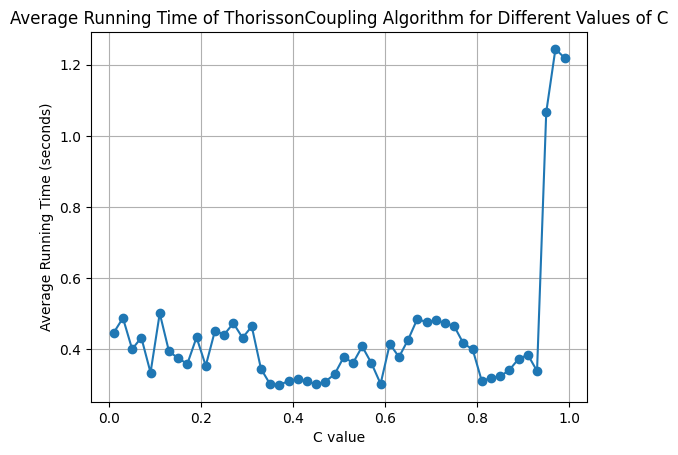

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Assume the definitions of ThorissonCoupling, sample_multivariate_normal, and multivariate_normal_pdf are above.

num_samples = 1000
num_runs = 10 
C_values = np.linspace(0.01, 0.99, 50)  # Values of C
average_running_times = []


for C in C_values:
    run_times = []  # Store running times for each run
    
    for _ in range(num_runs):
        start_time = time.time()  # Start the timer
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  # End the timer
        running_time = end_time - start_time  # Calculate the running time for this run
        run_times.append(running_time)
    
    average_running_times.append(np.mean(run_times))


import matplotlib.pyplot as plt

# Plot the average running times against the C values
plt.plot(C_values, average_running_times, '-o')
plt.xlabel('C value')
plt.ylabel('Average Running Time (seconds)')
plt.title('Average Running Time of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()

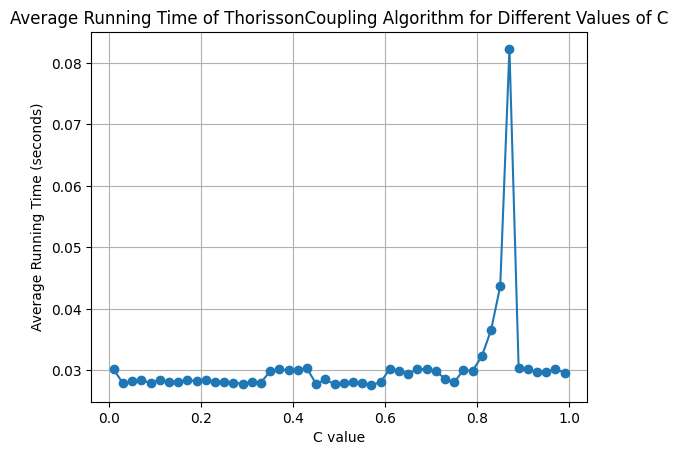

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Assume the definitions of ThorissonCoupling, sample_multivariate_normal, and multivariate_normal_pdf are above.

num_samples = 100
num_runs = 100  # Number of times to run the algorithm for each C value
C_values = np.linspace(0.01, 0.99, 50)  # Values of C
med_running_times = []


for C in C_values:
    run_times = []  # Store running times for each run
    
    for _ in range(num_runs):
        start_time = time.time()  # Start the timer
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  # End the timer
        running_time = end_time - start_time  # Calculate the running time for this run
        run_times.append(running_time)
    
    med_running_times.append(np.median(run_times))


import matplotlib.pyplot as plt

# Plot the average running times against the C values
plt.plot(C_values, med_running_times, '-o')
plt.xlabel('C value')
plt.ylabel('Average Running Time (seconds)')
plt.title('Average Running Time of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt



num_samples = 1000
num_runs = 100  
C_values = np.linspace(0.01, 0.99, 50)  
med_running_times = []


for C in C_values:
    run_times = []  #running times for each run
    
    for _ in range(num_runs):
        start_time = time.time()  
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  # End the timer
        running_time = end_time - start_time  # Calculate the running time for this run
        run_times.append(running_time)
    
    med_running_times.append(np.median(run_times))




# Plot the average running times against the C values
plt.plot(C_values, med_running_times, '-o')
plt.xlabel('C value')
plt.ylabel('Average Running Time (seconds)')
plt.title('Average Running Time of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

Running time variance

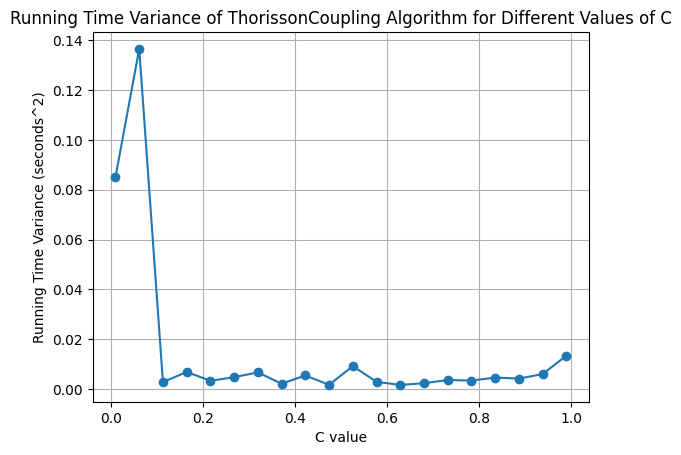

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


num_samples = 1000  
num_runs = 10  
C_values = np.linspace(0.01, 0.99, 20)  
running_time_variance = []

for C in C_values:
    run_times = []
    
    for _ in range(num_runs):
        start_time = time.time()  # Start the timer
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  # End the timer
        running_time = end_time - start_time  # Calculate the running time
        run_times.append(running_time)
    
    running_time_variance.append(np.var(run_times)) #var des 10 valeurs dans la liste run_times

# Plot the runtime variance against the C values
plt.plot(C_values, running_time_variance, '-o')
plt.xlabel('C value')
plt.ylabel('Running Time Variance (seconds^2)')
plt.title('Running Time Variance of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()


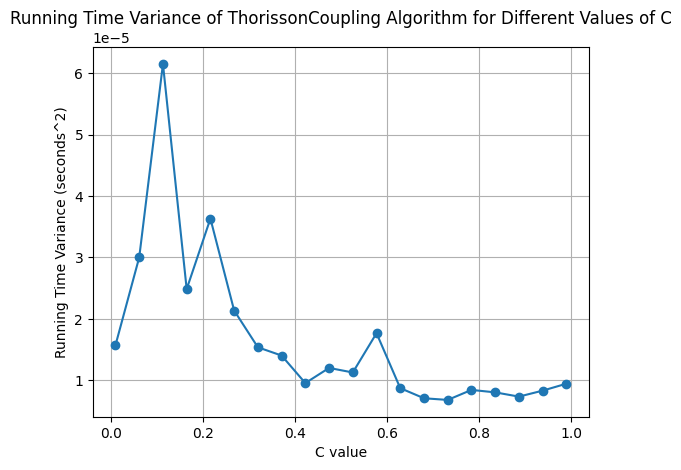

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


num_samples = 100  
num_runs = 100  
C_values = np.linspace(0.01, 0.99, 20)  
running_time_variance = []

for C in C_values:
    run_times = []
    
    for _ in range(num_runs):
        start_time = time.time()  # Start the timer
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  
        running_time = end_time - start_time  
        run_times.append(running_time)
    
    running_time_variance.append(np.var(run_times)) #var des 10 valeurs dans la liste run_times

# Plot the runtime variance against the C values
plt.plot(C_values, running_time_variance, '-o')
plt.xlabel('C value')
plt.ylabel('Running Time Variance (seconds^2)')
plt.title('Running Time Variance of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()


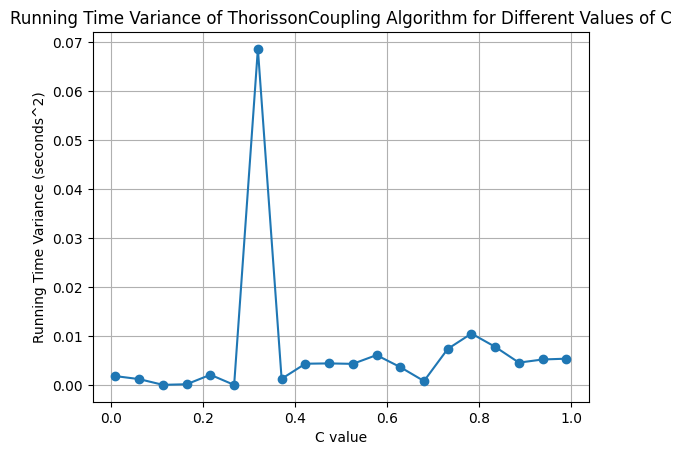

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


num_samples = 1000  
num_runs = 100  
C_values = np.linspace(0.01, 0.99, 20)  
running_time_variance = []

for C in C_values:
    run_times = []
    
    for _ in range(num_runs):
        start_time = time.time()  # Start the timer
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  
        running_time = end_time - start_time  
        run_times.append(running_time)
    
    running_time_variance.append(np.var(run_times)) #var des 10 valeurs dans la liste run_times

# Plot the runtime variance against the C values
plt.plot(C_values, running_time_variance, '-o')
plt.xlabel('C value')
plt.ylabel('Running Time Variance (seconds^2)')
plt.title('Running Time Variance of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()


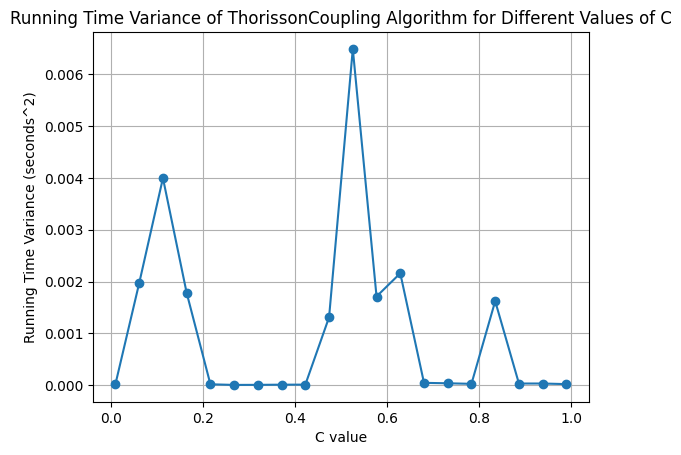

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


num_samples = 100  
num_runs = 1000  
C_values = np.linspace(0.01, 0.99, 20)  
running_time_variance = []

for C in C_values:
    run_times = []
    
    for _ in range(num_runs):
        start_time = time.time()  # Start the timer
        
        for _ in range(num_samples):
            X, Y = ThorissonCoupling(sample_multivariate_normal, sample_multivariate_normal,
                                     multivariate_normal_pdf, multivariate_normal_pdf,
                                     C, mean_p, cov_p, mean_q, cov_q)
        
        end_time = time.time()  
        running_time = end_time - start_time  
        run_times.append(running_time)
    
    running_time_variance.append(np.var(run_times)) #var des 10 valeurs dans la liste run_times

# Plot the runtime variance against the C values
plt.plot(C_values, running_time_variance, '-o')
plt.xlabel('C value')
plt.ylabel('Running Time Variance (seconds^2)')
plt.title('Running Time Variance of ThorissonCoupling Algorithm for Different Values of C')
plt.grid(True)
plt.show()


ALGO2 

In [ ]:
#PROBLEME DE DIMENSIONS

Application Normales tronquees (similaire a l'application 5.1 mais en utilisant Thorisson)

In [ ]:

#1 Thorisson univarie, cas generale (Algo Patryk)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def sample_normal(mu, sigma):
    return norm.rvs(loc=mu, scale=sigma)

def normal_pdf(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

def ThorissonCoupling(p_sample, q_sample, p_pdf, q_pdf, C):
    X = p_sample(0, 1)
    U = random.uniform(0, 1)

    if U < min((q_pdf(X, 2, 1) / p_pdf(X, 0, 1)), C):
        Y = X
    else:
        A = 0
        while A != 1:
            U = random.uniform(0, 1)
            Z = q_sample(2, 1)
            if U > min(1, (C * p_pdf(Z, 0, 1) / q_pdf(Z, 2, 1))):
                A = 1
                Y = Z
    return X, Y

C = 0.7
samples_X = []
samples_Y = []

for _ in range(1000):
    X, Y = ThorissonCoupling(lambda mu, sigma: sample_normal(mu, sigma),
    lambda mu, sigma: sample_normal(mu, sigma),
    lambda x, mu, sigma: normal_pdf(x, mu, sigma),
    lambda x, mu, sigma: normal_pdf(x, mu, sigma),C)
    samples_X.append(X)
    samples_Y.append(Y)

x_values = np.linspace(-4, 6, 1000)
p_theoretical = norm.pdf(x_values, 0, 1)
q_theoretical = norm.pdf(x_values, 2, 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_X, bins=30, density=True, alpha=0.6, color='g', label='Sampled from p ~ N(0,1)')
plt.plot(x_values, p_theoretical, 'k', linewidth=2, label='Theoretical p ~ N(0,1)')
plt.title('Distribution of samples from p and theoretical curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_Y, bins=30, density=True, alpha=0.6, color='b', label='Sampled from q ~ N(2,1)')
plt.plot(x_values, q_theoretical, 'k', linewidth=2, label='Theoretical q ~ N(2,1)')
plt.title('Distribution of samples from q and theoretical curve')
plt.legend()

plt.tight_layout()
plt.show()


Application: gaussian tails

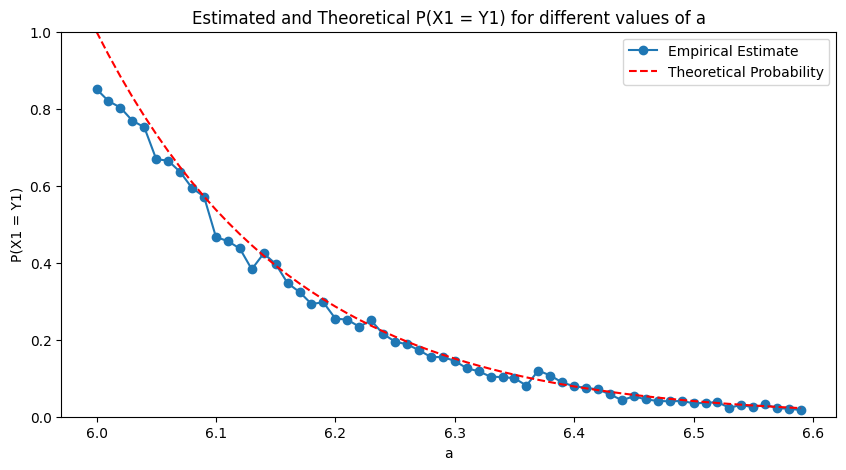

In [ ]:
#Application 5.1 
#Simuler des Normales tronquees

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm
from scipy.integrate import quad
import random

def s_truncated_normal(mu, sig, lower_bound):
    a = (lower_bound - mu) / sig
    b = np.inf  # Pas lim supérieure

    return truncnorm(a, b, loc=mu, scale=sig).rvs()


def truncated_normalpdf(x, mu, sig, lower_bound):

    a = (lower_bound - mu) / sig
    b = np.inf  
    return truncnorm(a, b, loc=mu, scale=sig).pdf(x)


def Thorisson2(p_sample, q_sample, p_pdf, q_pdf, C, lower_bound_p, lower_bound_q):
    X = p_sample(0, 1, lower_bound_p)
    U = random.uniform(0, 1)
    if U < min((q_pdf(X, 2, 1, lower_bound_q) / p_pdf(X, 0, 1, lower_bound_p)), C):
        Y = X
    else:
        Y = None
        while Y is None:
            U = random.uniform(0, 1)
            Z = q_sample(2, 1, lower_bound_q)
            if U > min(1, (C * p_pdf(Z, 0, 1, lower_bound_p) / q_pdf(Z, 2, 1, lower_bound_q))):
                Y = Z
    return X, Y

C = 0.95
a_values = np.arange(6, 6.6, 0.01)
P_X1_Y1_estimates = []
n_samples = 1000
tol= 1e-5
P_X1_Y1_theoretical = []


for a in a_values:
    count = 0
    for _ in range(n_samples):
        X, Y = Thorisson2(s_truncated_normal, s_truncated_normal, 
                                 truncated_normalpdf, truncated_normalpdf, C, 6, a)
        if np.abs(X - Y) <= tol:
            count += 1
    P_X1_Y1_estimates.append(count / n_samples)


    p = lambda x: truncnorm.pdf(x, (6 - 0) / 1, np.inf, loc=0, scale=np.sqrt(1))
    q = lambda x: truncnorm.pdf(x, (a - 0) / 1, np.inf, loc=0, scale=np.sqrt(1))
    min_pq = lambda x: np.minimum(p(x), q(x))
    true_pxy, _ = quad(min_pq, 6, np.inf)
    P_X1_Y1_theoretical.append(true_pxy)


plt.figure(figsize=(10, 5))
plt.plot(a_values, P_X1_Y1_estimates, '-o', label='Empirical Estimate')
plt.plot(a_values, P_X1_Y1_theoretical, 'r--', label='Theoretical Probability')

plt.xlabel('a')
plt.ylabel('P(X1 = Y1)')
plt.title('Estimated and Theoretical P(X1 = Y1) for different values of a')
plt.ylim(0, 1)
plt.legend()
plt.show()


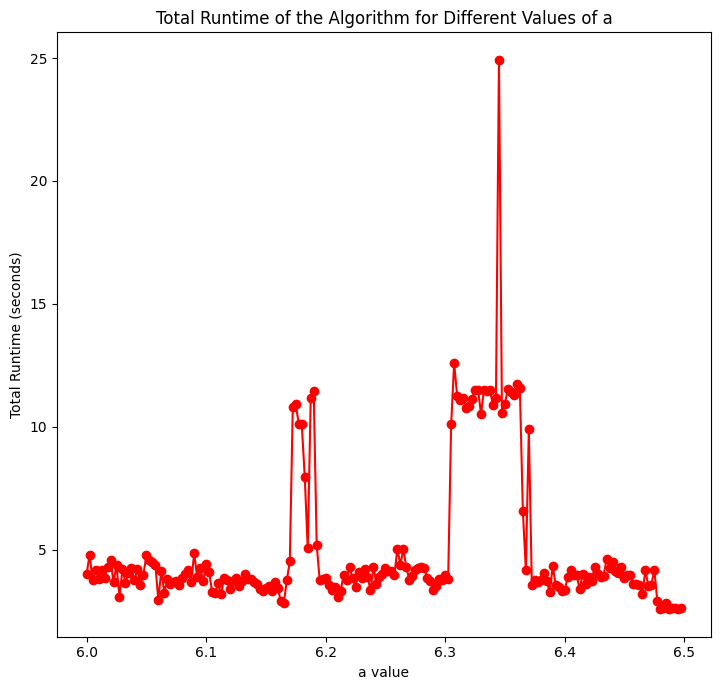

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm
import random
import time

C = 0.95
nombre_points = 200
inc = (6.5 - 6) / nombre_points
a_values = np.arange(6, 6.5, inc)

P_X1_Y1_estimates = []
total_runtimes = []
n_samples=1000


for a in a_values:
    start_time = time.time()  # Start timing for runtime
    
    count = 0
    for _ in range(num_samples):
        X, Y = Thorisson2(s_truncated_normal, s_truncated_normal, 
                                 truncated_normalpdf, truncated_normalpdf, C, 6, a)
        if np.abs(X - Y) <= tol:
            count += 1

    end_time = time.time()  # End timing for runtime
    total_runtime = end_time - start_time
    total_runtimes.append(total_runtime)
    
    P_X1_Y1_estimates.append(count / n_samples)  


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 2)
plt.plot(a_values, total_runtimes, '-o', color='red')
plt.xlabel('a')
plt.ylabel('Total Runtime ')
plt.title('Total Runtime of the Algorithm for Different Values of a')
plt.tight_layout()

plt.show()


Application 5.1 appliquee a Thorisson avec C faible (C=0.01, normalement on doit avoir P(X1=Y1) faible et Running time inferieur au cas C=0.95)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, norm
import random
import time

C = 0.01
nombre_points = 200
inc = (6.5 - 6) / nombre_points
a_values = np.arange(6, 6.5, inc)
tol= 1e-5

P_X1_Y1_estimates = []
total_runtimes = []
num_samples=1000

for a in a_values:
    start_time = time.time()  
    
    count = 0
    for _ in range(num_samples):
        X, Y = Thorisson2(s_truncated_normal, s_truncated_normal, 
                                 truncated_normalpdf, truncated_normalpdf, C, 6, a)
        if np.abs(X - Y) <= tol:
            count += 1

    end_time = time.time()  # End timing for runtime
    total_runtime = end_time - start_time
    total_runtimes.append(total_runtime)
    
    P_X1_Y1_estimates.append(count / num_samples)  

plt.figure(figsize=(14, 7))

# Plot estimated P(X1 = Y1) et P(X1=Y1) theoretical
plt.subplot(1, 2, 1)
plt.plot(a_values, P_X1_Y1_estimates, '-o')
plt.xlabel('a')
plt.ylabel('Estimated P(X1 = Y1)')
plt.title('Estimated P(X1 = Y1) for different values of a')
plt.ylim(0, 1)


# Plot total runtime
plt.subplot(1, 2, 2)
plt.plot(a_values, total_runtimes, '-o', color='red')
plt.xlabel('a value')
plt.ylabel('Total Runtime')
plt.title('Total runtime of Thorisson for different values of a')
plt.tight_layout()

plt.show()


KeyboardInterrupt: 

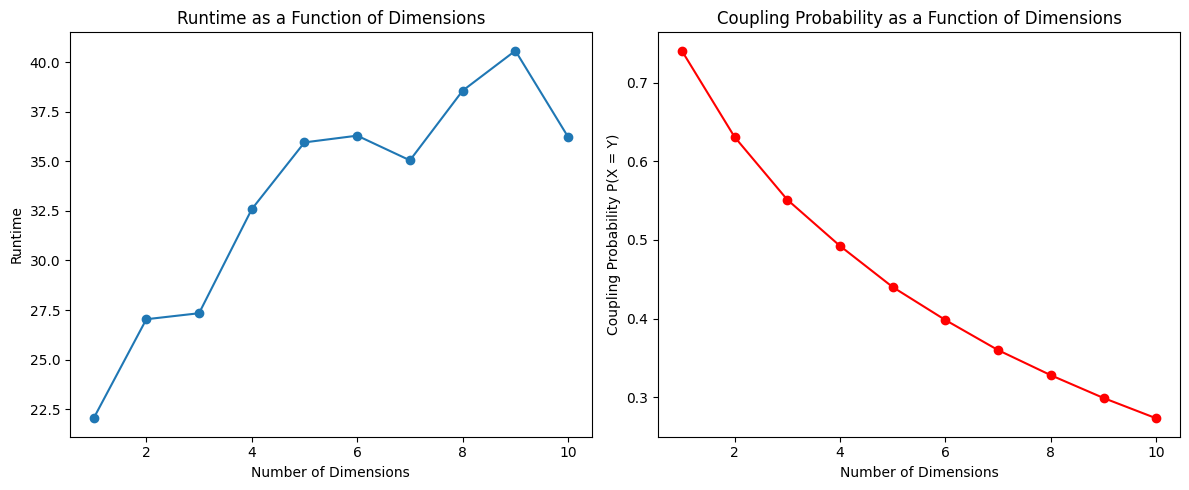

In [46]:
#Coupling dimensions: Thorisson



#Runtime as a function of the number of dimensions Thorisson
#coupling probability as function of the number of dimensiosn Thorisson 

#Prendre p=N(0,2*Id)et q=N(1,3*Id) d=1,...10
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import multivariate_normal
import random



def s_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)

def multi_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)

#C=1
def Thorisson3(p_sample, q_sample, p_pdf, q_pdf, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)
    if U < (q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)):
        Y = X
        coupling_C = 1

    else:
        A = 0
        coupling_C=0        
        while A != 1:
            U = random.uniform(0, 1)
            Z = q_sample(2, 1)
            if U > min(1, ( p_pdf(Z, 0, 1) / q_pdf(Z, 2, 1))):
                A = 1
                Y = Z
    return X, Y, coupling_C



dimension = range(1, 11)  # dimensions from 1 to 10
num_samples = 100000  # number of samples per experiment

runtimes = []
coupling_prob = []

for d in dimension:
    start_time = time.time()
    mean_p = np.zeros(d)
    cov_p = 2 * np.identity(d)
    mean_q = np.ones(d)
    cov_q = 3 * np.identity(d)

    couplings_C = 0
    for i in range(num_samples):
        _, _, is_coupled = Thorisson3(
            sample_multivariate_normal, sample_multivariate_normal,
            multivariate_normal_pdf, multivariate_normal_pdf,mean_p, cov_p, mean_q, cov_q
        )
        couplings_C += is_coupled
    
    runtime = time.time() - start_time
    runtimes.append(runtime)
    coupling_prob.append(couplings_C / num_samples)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dimension, runtimes, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Runtime')
plt.title('Runtime as a Function of Dimensions')

# Plot Coupling Probability as a function of dimensions
plt.subplot(1, 2, 2)
plt.plot(dimension, coupling_prob, marker='o', color='r')
plt.xlabel('Number of Dimensions')
plt.ylabel('Coupling Probability P(X = Y)')
plt.title('Coupling Probability as a Function of Dimensions')
plt.tight_layout()
plt.show()


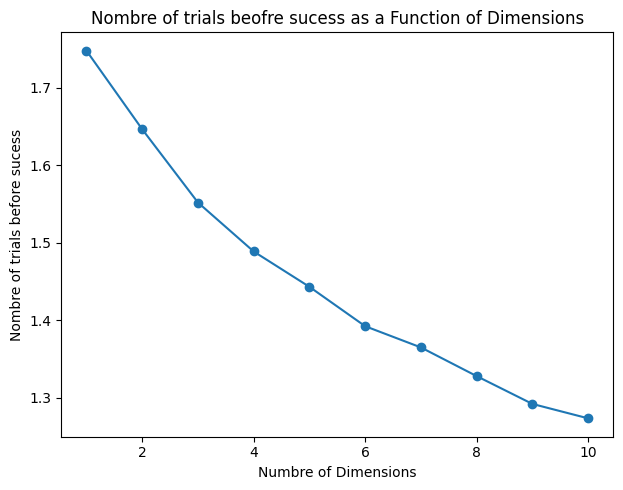

In [65]:

def s_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)

def multi_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)



def Thorisson4(p_sample, q_sample, p_pdf, q_pdf, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)
    nbr_trials=0
    if U < (q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)):
        Y = X
        nbr_trials=1

    else:
        A = 0       
        while A != 1:
            nbr_trials +=1
            U = random.uniform(0, 1)
            Z = q_sample(mean_q, cov_q)
            if U > min(1, ( p_pdf(Z, mean_p, cov_p) / q_pdf(Z, mean_q, cov_q))):
                A = 1
                Y = Z
    return X, Y, nbr_trials

dimension = range(1, 11)  # dimensions from 1 to 10
num_samples = 10000  # number of samples per experiment
nbr_trials_d=[]


for d in dimension:
    #start_time = time.time()
    trials_d=[]
    mean_p = np.zeros(d)
    cov_p = 2 * np.identity(d)
    mean_q = np.ones(d)
    cov_q = 3 * np.identity(d)
    
    for i in range(num_samples):
        a, b, trials = Thorisson4(
            sample_multivariate_normal, sample_multivariate_normal,
            multivariate_normal_pdf, multivariate_normal_pdf,mean_p, cov_p, mean_q, cov_q
        )
        trials_d.append(trials)
    
    nbr_trials=np.mean(trials_d)
    nbr_trials_d.append(nbr_trials)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dimension, nbr_trials_d, marker='o')
plt.xlabel('Numbre of Dimensions')
plt.ylabel('Nombre of trials before sucess')
plt.title('Nombre of trials beofre sucess as a Function of Dimensions')
plt.tight_layout()
plt.show()


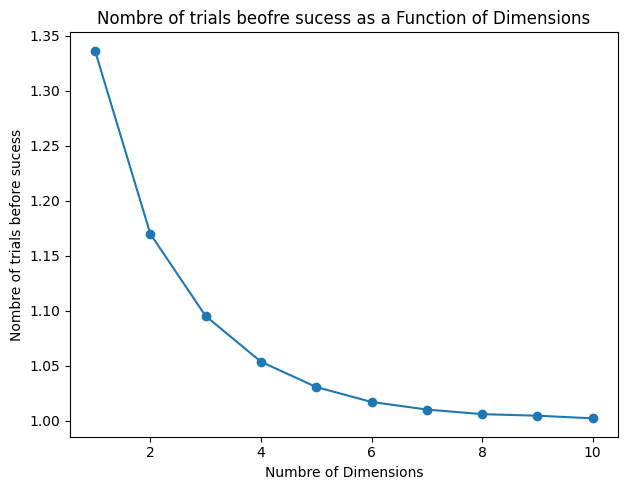

In [66]:

def s_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)

def multi_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)



def Thorisson4(p_sample, q_sample, p_pdf, q_pdf, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)
    nbr_trials=0
    if U < (q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)):
        Y = X
        nbr_trials=1

    else:
        A = 0       
        while A != 1:
            nbr_trials +=1
            U = random.uniform(0, 1)
            Z = q_sample(mean_q, cov_q)
            if U > min(1, ( p_pdf(Z, mean_p, cov_p) / q_pdf(Z, mean_q, cov_q))):
                A = 1
                Y = Z
    return X, Y, nbr_trials



dimension = range(1, 11)  # dimensions from 1 to 10
num_samples = 10000  # number of samples per experiment
nbr_trials_d=[]


for d in dimension:
    #start_time = time.time()
    trials_d=[]
    mean_p = np.zeros(d)
    cov_p = 2 * np.identity(d)
    mean_q = np.full(d, 3)
    cov_q = 3 * np.identity(d)
    
    for i in range(num_samples):
        a, b, trials = Thorisson4(
            sample_multivariate_normal, sample_multivariate_normal,
            multivariate_normal_pdf, multivariate_normal_pdf,mean_p, cov_p, mean_q, cov_q)
        trials_d.append(trials)
    
    nbr_trials=np.mean(trials_d)
    nbr_trials_d.append(nbr_trials)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dimension, nbr_trials_d, marker='o')
plt.xlabel('Numbre of Dimensions')
plt.ylabel('Nombre of trials before sucess')
plt.title('Nombre of trials beofre sucess as a Function of Dimensions')
plt.tight_layout()
plt.show()


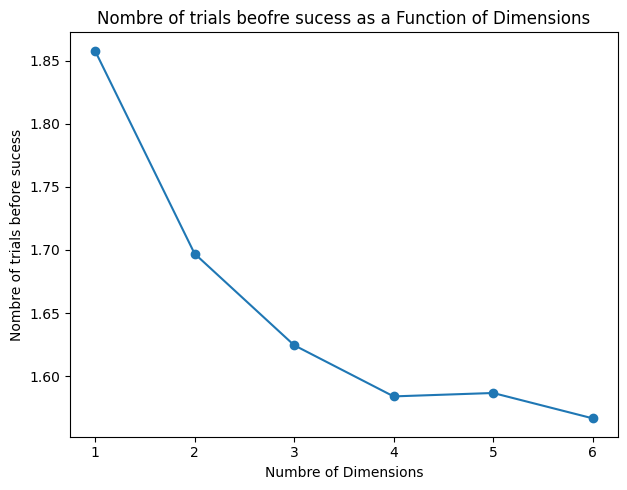

In [67]:

def s_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)

def multi_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)



def Thorisson4(p_sample, q_sample, p_pdf, q_pdf, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)
    nbr_trials=0
    if U < (q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)):
        Y = X
        nbr_trials=1

    else:
        A = 0       
        while A != 1:
            nbr_trials +=1
            U = random.uniform(0, 1)
            Z = q_sample(2, 1)
            if U > min(1, ( p_pdf(Z, mean_p, cov_p) / q_pdf(Z, mean_q, cov_q))):
                A = 1
                Y = Z
    return X, Y, nbr_trials



dimension = range(1, 7)  # dimensions from 1 to 10
num_samples = 10000  # number of samples per experiment
nbr_trials_d=[]


for d in dimension:
    #start_time = time.time()
    trials_d=[]
    mean_p = np.zeros(d)
    cov_p = 2 * np.identity(d)
    mean_q = np.full(d, 3)
    cov_q = 3 * np.identity(d)
    
    for i in range(num_samples):
        a, b, trials = Thorisson4(
            sample_multivariate_normal, sample_multivariate_normal,
            multivariate_normal_pdf, multivariate_normal_pdf,mean_p, cov_p, mean_q, cov_q
        )
        #print(trials)
        trials_d.append(trials)
    
    nbr_trials=np.mean(trials_d)
    nbr_trials_d.append(nbr_trials)

#print(nbr_trials_d)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dimension, nbr_trials_d, marker='o')
plt.xlabel('Numbre of Dimensions')
plt.ylabel('Nombre of trials before sucess')
plt.title('Nombre of trials beofre sucess as a Function of Dimensions')
plt.tight_layout()
plt.show()


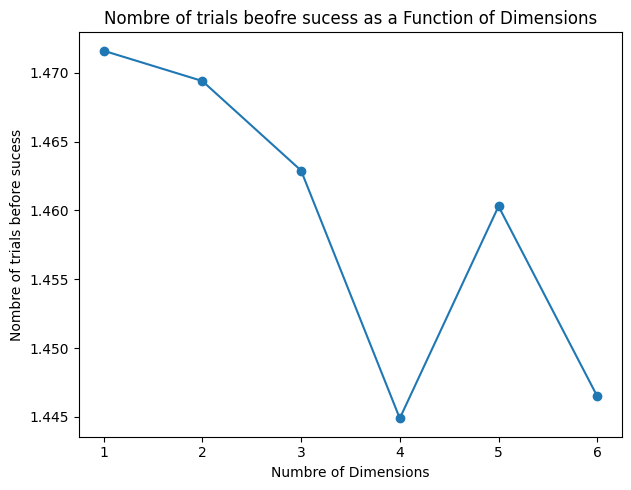

In [64]:

def s_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)

def multi_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)



def Thorisson4(p_sample, q_sample, p_pdf, q_pdf, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)
    nbr_trials=0
    if U < (q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)):
        Y = X
        nbr_trials=1

    else:
        A = 0       
        while A != 1:
            nbr_trials +=1
            U = random.uniform(0, 1)
            Z = q_sample(2, 1)
            if U > min(1, ( p_pdf(Z, 0, 1) / q_pdf(Z, 2, 1))):
                A = 1
                Y = Z
    return X, Y, nbr_trials



dimension = range(1, 7)  # dimensions from 1 to 10
num_samples = 10000  # number of samples per experiment
nbr_trials_d=[]


for d in dimension:
    #start_time = time.time()
    trials_d=[]
    mean_p = np.zeros(d)
    cov_p = np.identity(d)
    mean_q = np.full(d, 100)
    cov_q = np.identity(d)
    
    for i in range(num_samples):
        a, b, trials = Thorisson4(
            sample_multivariate_normal, sample_multivariate_normal,
            multivariate_normal_pdf, multivariate_normal_pdf,mean_p, cov_p, mean_q, cov_q
        )
        trials_d.append(trials)
    
    nbr_trials=np.mean(trials_d)
    nbr_trials_d.append(nbr_trials)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dimension, nbr_trials_d, marker='o')
plt.xlabel('Numbre of Dimensions')
plt.ylabel('Nombre of trials before sucess')
plt.title('Nombre of trials beofre sucess as a Function of Dimensions')
plt.tight_layout()
plt.show()


In [68]:
import numpy as np
from scipy.stats import multivariate_normal
import random
import time
import matplotlib.pyplot as plt

def s_multivariate_normal(mean, cov):
    return multivariate_normal.rvs(mean=mean, cov=cov)

def multi_normal_pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)



def Thorisson4(p_sample, q_sample, p_pdf, q_pdf, mean_p, cov_p, mean_q, cov_q):
    X = p_sample(mean_p, cov_p)
    U = random.uniform(0, 1)
    nbr_trials = 1  
    if U < (q_pdf(X, mean_q, cov_q) / p_pdf(X, mean_p, cov_p)):
        Y = X
    else:
        A = 0
        while A!=1 :
            nbr_trials += 1  
            Z = q_sample(mean_q, cov_q)
            U = random.uniform(0, 1)
            if U <= min(1, (p_pdf(Z, mean_p, cov_p) / q_pdf(Z, mean_q, cov_q))):
                Y = Z
                A=1
    return X, Y, nbr_trials


dimension = range(1, 7)  
num_samples = 1000000  
trials_per_dimension = {d: [] for d in dimension}                 # To store trials for each dimension



for d in dimension:
    mean_p = np.zeros(d)
    cov_p = 2 * np.identity(d)
    mean_q = np.ones(d)
    cov_q = 3 * np.identity(d)
    

    for _ in range(num_samples):
        _, _, trials = Thorisson4(
            s_multivariate_normal, s_multivariate_normal,
            multi_normal_pdf, multi_normal_pdf,
            mean_p, cov_p, mean_q, cov_q
        )
        trials_per_dimension[d].append(trials)



fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10)) # Adjust the size as needed
fig.suptitle('Distribution of Number of Trials Before Success by Dimension')


axes = axes.flatten()


for i, d in enumerate(dimension):
    axes[i].hist(trials_per_dimension[d], bins=30, alpha=0.5, density=True)
    axes[i].set_title(f'Dim {d}')
    axes[i].set_xlabel('Number of Trials Before Success')
    axes[i].set_ylabel('Density')



for i in range(len(dimension), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])                 # Adjust the rectangle in which to fit the subplots
plt.show()



In [47]:
#Algo auteurs:


import numpy as np

def modified_thorisson(p, q, log_p, log_q, C=1.):
    """
        The number of trials before acceptance
    """
    C = np.clip(C, 0., 1.)
    log_w = lambda x: log_q(x) - log_p(x)
    def log_phi(x):
        return np.minimum(log_w(x), np.log(C))

    X = p()
    log_u = np.log(np.random.uniform())

    # P(accept) = phi(X)
    accept_X_init = log_u < log_phi(X)
    n_trials = 1

    while not accept_X_init:
        Y = q()
        log_v = np.log(np.random.uniform())

        # P(accept) = 1 - phi(Y)/w(Y)
        accept_X_init = log_v > log_phi(Y) - log_w(Y)
        if accept_X_init:
            Z = Y
        n_trials += 1

    return X, Z, accept_X_init, n_trials  #Ils ont inverses Z et Y

# Example usage with dummy functions
p = lambda: np.random.normal(0, 2)
q = lambda: np.random.normal(1, 3)
log_p = lambda x: -0.5 * ((x - 0) / 2) ** 2
log_q = lambda x: -0.5 * ((x - 1) / 3) ** 2

X, Z, is_coupled, n_trials = modified_thorisson(p, q, log_p, log_q)
print(X, Z, is_coupled, n_trials)


UnboundLocalError: cannot access local variable 'Z' where it is not associated with a value